# 7.1 KLD sampling

## 7.1.2 calculation of number of particles

In [5]:
import sys
sys.path.append('../scripts/')
from robot import *
from scipy.stats import norm, chi2

In [6]:
def num_particles(epsilon=0.1, delta=0.01, binnum=1000):
    return math.ceil(chi2.ppf(1-delta, binnum-1)/(2*epsilon)) #ppf: percent point function

In [7]:
def bin_N(min_bin, max_bin):
    num_bins = np.arange(min_bin, max_bin)
    eps = 0.1
    delta = 0.01
    N = [num_particles(eps, delta, b) for b in num_bins]
    return num_bins, N

<IPython.core.display.Javascript object>


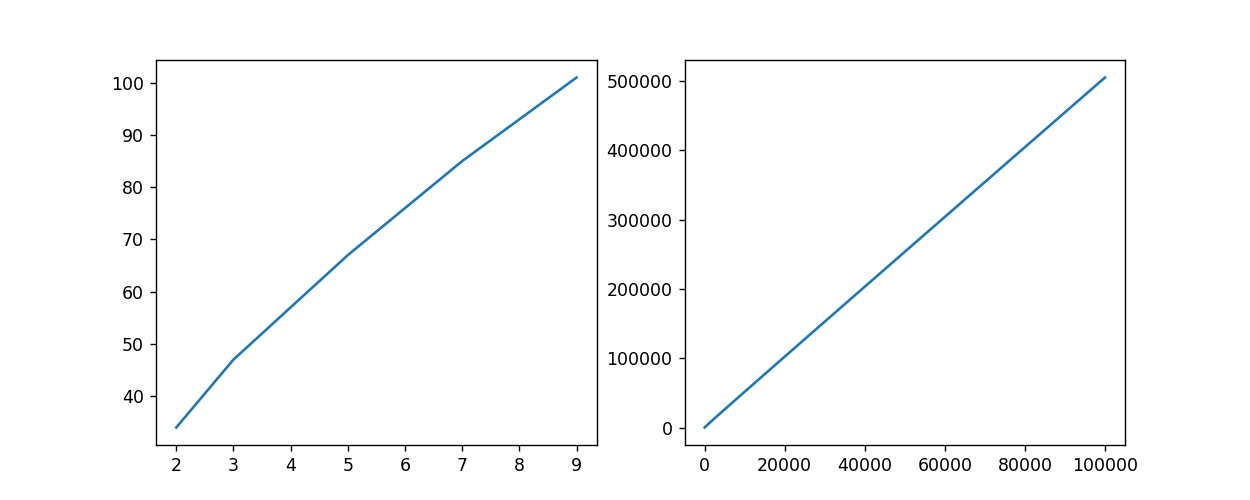

In [4]:
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(10,4))
xs,ys = bin_N(2, 10)
axl.plot(xs,ys)
xs,ys = bin_N(2,100000)
axr.plot(xs,ys)
plt.show()

## 7.1.3 implement to MCL

In [9]:
from mcl import *

In [10]:
class KldMcl(Mcl):
    def __init__(self, envmap, init_pose, max_num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},
                 distance_dev_rate=0.14, direction_dev=0.05,
                width = np.array([0.2,0.2,math.pi/18]).T, epsilon=0.1, delta=0.01): # this line is kld parameters.
        super().__init__(self, envmap, init_pose, 1, motion_noise_stds,
                         distance_dev_rate, direction_dev)
        self.width = width
        self.max_num = max_num
        self.epsilon = epsilon
        self.delta = delta
        self.binnum = 0
        
    def motion_update(self, nu, omega, time):